In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
base_dir = os.path.expanduser('~') + '/leapTracker/datafiles/direction'

training_file = os.path.join(base_dir, 'intermediate_training_datafiles.pkl')
training_object = pickle.load(open(training_file, 'rb'))

test_data = os.path.join(base_dir, 'intermediate_testing_datafiles.pkl')
test_object = pickle.load(open(test_data, 'rb'))

In [3]:
training_data = np.array(training_object)
print(training_data.shape)

(8, 67, 56, 13)


In [4]:
data = training_data[:,:,6:,:]  # first six rows contain timing data that is irrelevant for the model

print(data.shape)
print('Transposed {}'.format(data[3].T.shape))  # better organization for model

(8, 67, 50, 13)
Transposed (13, 50, 67)


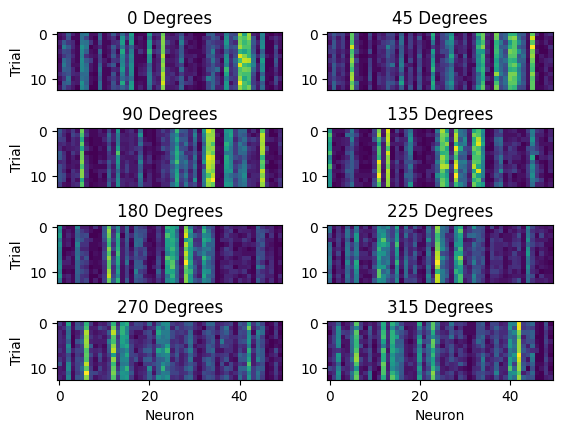

In [5]:
firing_rates = np.zeros((data.shape[0], data.shape[3], data.shape[2]))
directions = np.zeros((104,))
k = 0
for i in range(data.shape[0]):
    temp_data = data[i].T
    for j in range(temp_data.shape[0]):
        firing_rates[i,j,:] = np.mean(temp_data[j], axis=1)
        directions[k] = i
        k +=1
    plt.subplot(4,2,i+1)
    plt.imshow(firing_rates[i])
    plt.xlabel('')
    plt.xticks([])
    plt.ylabel('')
    plt.title('{} Degrees'.format(i*45))

    if i % 2 == 0:
        plt.ylabel('Trial')
    
    if i == 6 or i == 7:
        plt.xlabel('Neuron')
        plt.xticks([0, 20, 40])
plt.show()

In [6]:
print(firing_rates.shape)

firing_data = np.reshape(firing_rates, [-1, 50])

print(firing_data.shape)
print(directions.shape)

(8, 13, 50)
(104, 50)
(104,)


In [7]:
training_dict = dict()
training_dict['firing'] = firing_data
training_dict['directions'] = (directions*45).astype(int)

In [8]:
f = open(os.path.join(base_dir, 'final_training_data.pkl'), 'wb')
pickle.dump(training_dict, f)
f.close()

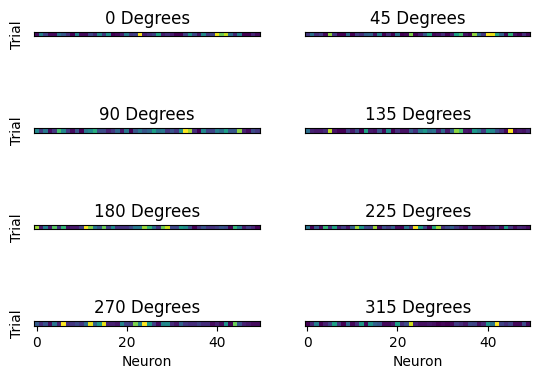

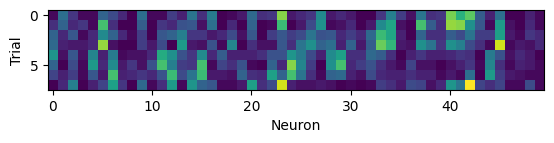

In [11]:
testing_data = np.array(test_object)
data = testing_data[:,:,6:,0]  # removing redundant second final dimension
firing_rates = np.zeros((8,50))

for i in range(data.shape[0]):
    temp_data = data[i].T
    for j in range(temp_data.shape[0]):
        firing_rates[i,j] = np.mean(temp_data[j])
    plt.subplot(4,2,i+1)
    plt.imshow(firing_rates[i].reshape(1,-1))
    plt.xlabel('')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('')
    plt.title('{} Degrees'.format(i*45))

    if i % 2 == 0:
        plt.ylabel('Trial')
    
    if i == 6 or i == 7:
        plt.xlabel('Neuron')
        plt.xticks([0, 20, 40])
plt.show()

plt.imshow(firing_rates)
plt.xlabel('Neuron')
plt.ylabel('Trial')
plt.show()

In [ ]:
print(firing_rates.shape)

firing_data = np.reshape(firing_rates, [-1, 50])
directions = np.linspace(0,315,8)
print(directions)

print(firing_data.shape)
print(directions.shape)

(8, 50)
[  0.  45.  90. 135. 180. 225. 270. 315.]
(8, 50)
(8,)


In [ ]:
testing_dict = dict()
testing_dict['firing'] = firing_data
testing_dict['directions'] = directions.astype(int)

In [ ]:
f = open(os.path.join(base_dir, 'final_testing_data.pkl'), 'wb')
pickle.dump(testing_dict, f)
f.close()

In [36]:
from scipy.stats import skewnorm
a=10
data= skewnorm.rvs(a, scale=2, size=192).astype(int)+2
print(data.shape)

(192,)


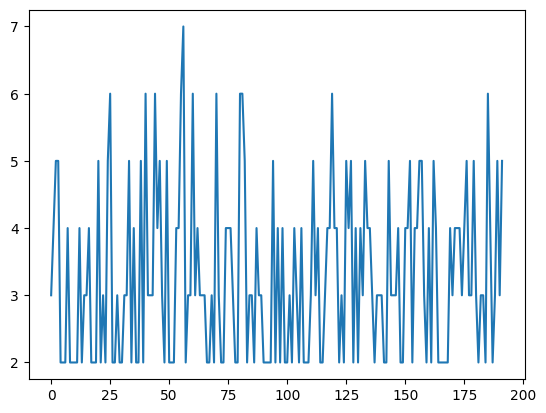

In [37]:
plt.plot(data)

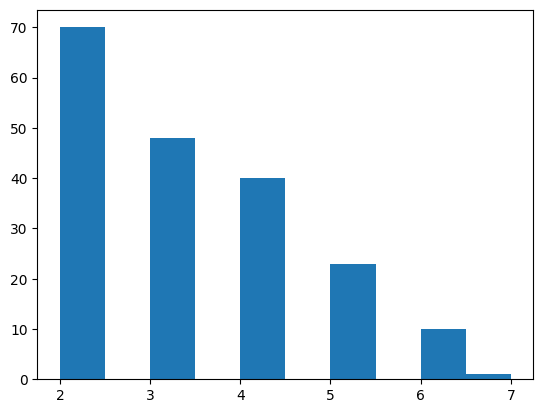

In [38]:
plt.hist(data)
plt.show()